<a href="https://colab.research.google.com/github/dasbidyendu/ShortCircuitMLTask/blob/main/Task1SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<h1>Dataset Analysis and cleanup</h1>


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('drive/MyDrive/insurance.csv')

In [16]:
#info about dataset
print(df.info())
print(df.describe())

#first 10 rows
print(df.head(10))

#number of null entries
print("Total null entries per column : ",df.isnull().sum())

# number of non-unique rows
print("Total number of duplicate values : ",df.duplicated().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max

**The dataset has no null entries but has one duplicate entry **

In [17]:
#cleaning duplicates
df = df.drop_duplicates()

In [18]:
model = LinearRegression()

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

X = df[['age','sex','bmi','children','smoker','region']]
Y = df[['expenses']]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)


In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)

print("R2 Score : ",r2)
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))

maxpred = np.argmax(Y_pred)
minpred = np.argmin(Y_pred)

Y_plot = [Y_pred[minpred],Y_pred[maxpred]]

print(Y_plot)


X_plot = [X_test['age'].iloc[minpred],X_test['age'].iloc[maxpred]]

print(X_plot)


R2 Score :  0.8068280291899952
MSE :  35496521.90058502
RMSE :  5957.8957611379055
[array([-1222.14150428]), array([39781.71547991])]
[19, 54]


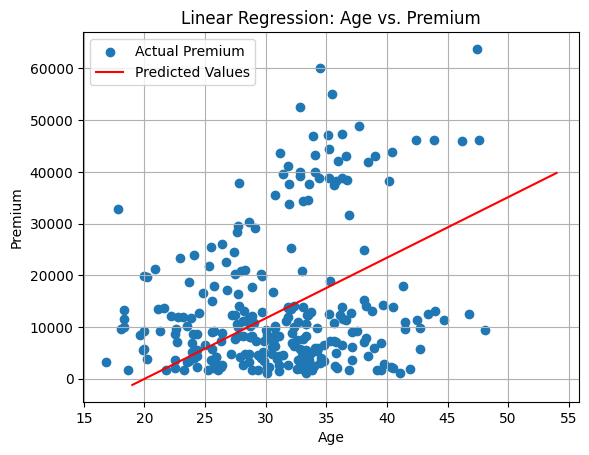

In [43]:
plt.scatter(X_test['bmi'], Y_test, label="Actual Premium")  # Scatter plot of actual data
plt.plot(X_plot, Y_plot, color='red', label="Predicted Values")  # Regression line
plt.xlabel("Age")
plt.ylabel("Premium")
plt.title("Linear Regression: Age vs. Premium")
plt.legend()
plt.grid(True)
plt.show()